# Task 3 - Customer Segmentation Analysis

Importing the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = pd.read_csv("Mall_Customers.csv")
x.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data pre processing

In [4]:
x.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
x.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Data Analysis

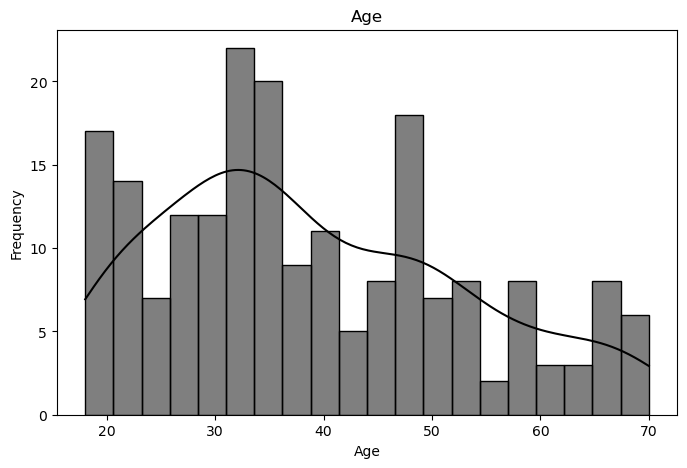

In [7]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(x['Age'],bins=20,kde=True,color='black')
plt.title("Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

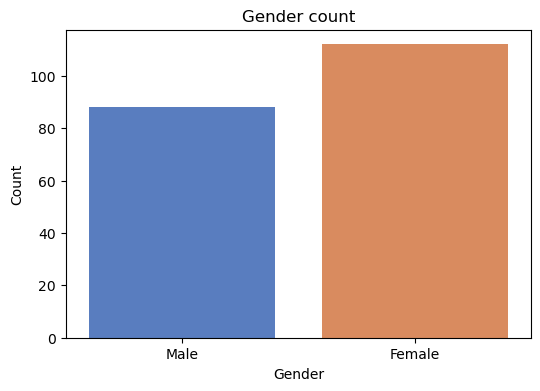

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',data=x,palette='muted')
plt.title('Gender count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

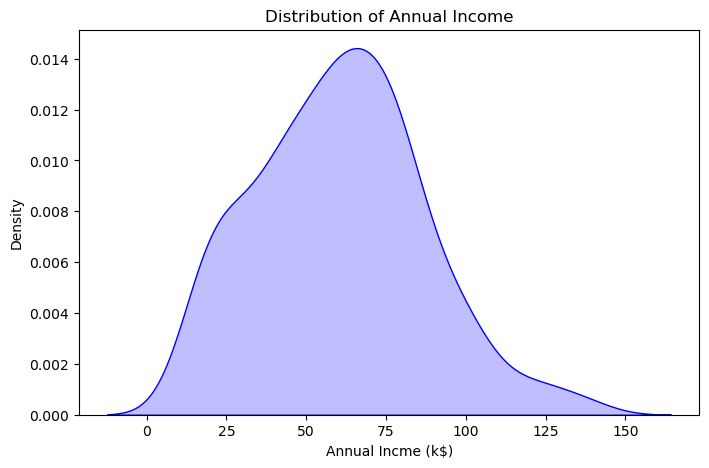

In [9]:
plt.figure(figsize=(8,5))
sns.kdeplot(x['Annual Income (k$)'],shade=True,color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Incme (k$)')
plt.ylabel('Density')
plt.show()

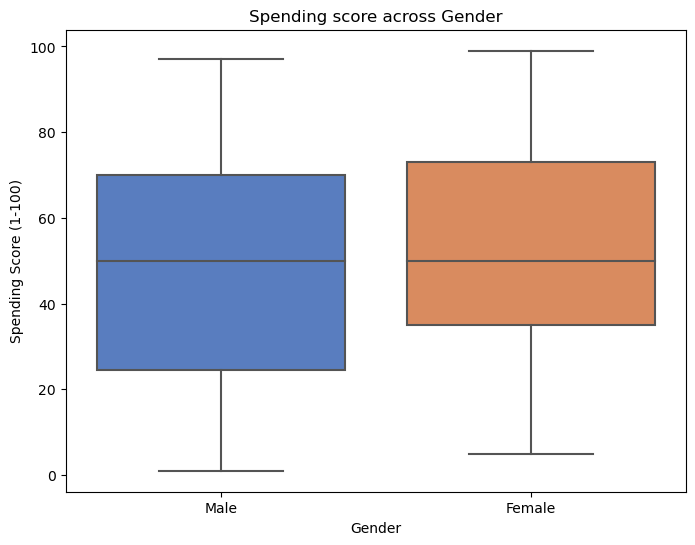

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=x, palette='muted')
plt.title("Spending score across Gender")
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

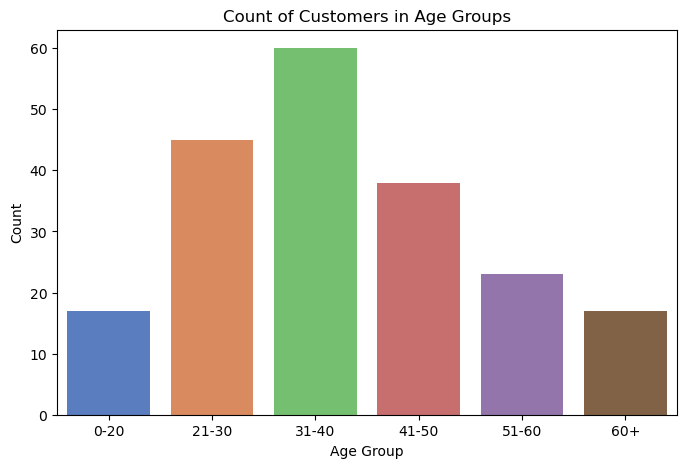

In [11]:
x['Age_Group'] = pd.cut(x['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', data=x, palette='muted')
plt.title('Count of Customers in Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

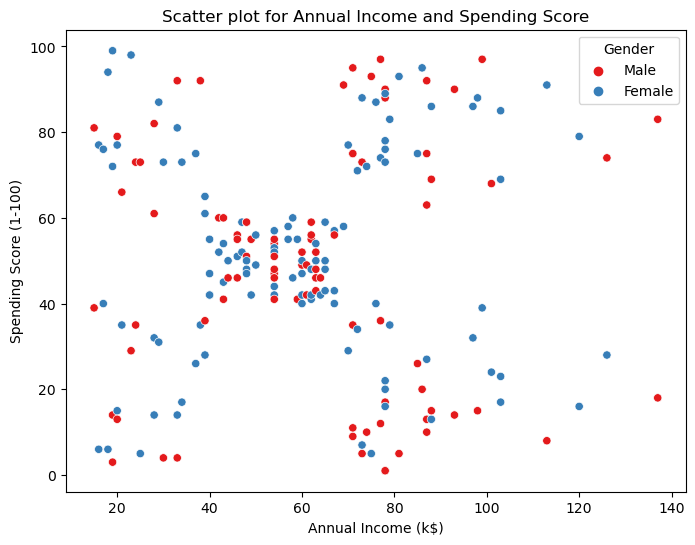

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=x, palette='Set1')
plt.title('Scatter plot for Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Building the model

K-means clustering

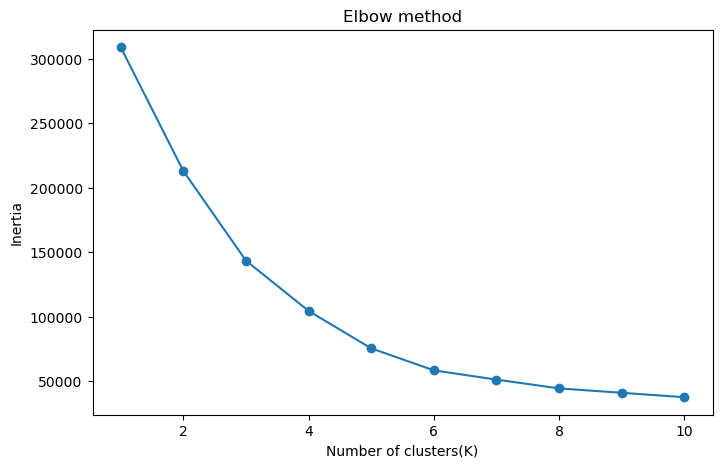

In [14]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
X=x[['Age','Annual Income (k$)','Spending Score (1-100)']]
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(range(1,11),inertia,marker='o')
plt.title("Elbow method")
plt.xlabel('Number of clusters(K)')
plt.ylabel('Inertia')
plt.show()

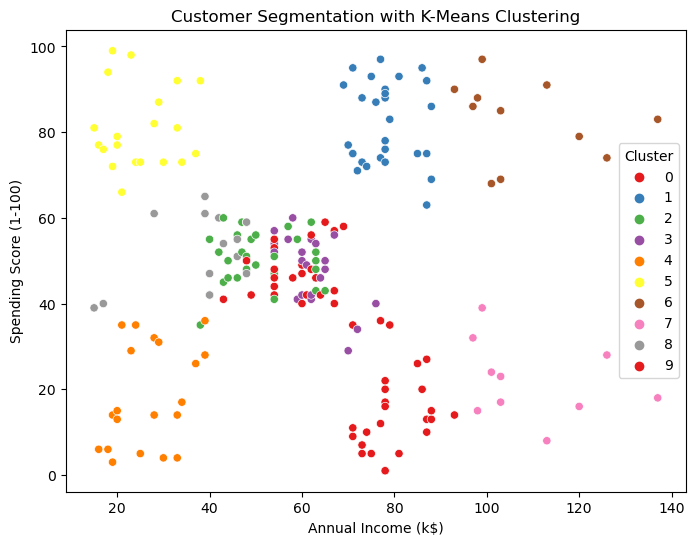

In [16]:
Kmeans=KMeans(n_clusters=5,random_state=42)
x['Cluster']=kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=x, palette='Set1')
plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Cluster 0 - Center: [41.         80.18181818 12.68181818]
Cluster 1 - Center: [32.78571429 78.03571429 81.89285714]
Cluster 2 - Center: [61.44444444 51.18518519 50.44444444]
Cluster 3 - Center: [23.57142857 62.14285714 47.95238095]
Cluster 4 - Center: [46.25 26.75 18.35]
Cluster 5 - Center: [24.85 24.95 81.  ]
Cluster 6 - Center: [ 32.45454545 108.18181818  82.72727273]
Cluster 7 - Center: [ 41.  109.7  22. ]
Cluster 8 - Center: [27.06666667 38.6        52.13333333]
Cluster 9 - Center: [46.19230769 60.61538462 46.15384615]


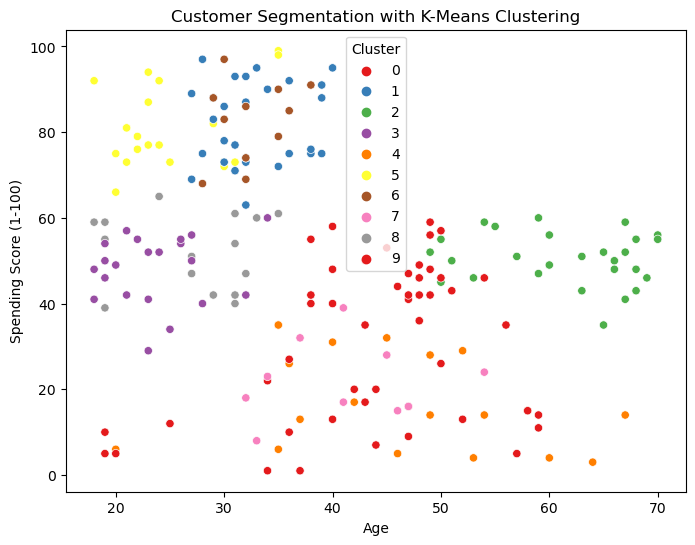

In [17]:
cluster_centers = kmeans.cluster_centers_
for i in range(len(cluster_centers)):
    print(f"Cluster {i} - Center: {cluster_centers[i]}")
    
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=x, palette='Set1')
plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()